# 1 Preparation

## What is the purpose of an activation function in NN in general?
The activation function decides what output the neuron should give in relation to its input values and weights.

## What’s the advantage of e.g. sigmoid over the step function (threshold function)?
The sigmoid function allows for a smoother activation rather than an on-off activation as seen in the step function. With this we can express uncertainty in our classifications.


## How does sigmoid look like (the formula as well as the graph)?

Formula:
$\sigma(x) = \frac{1}{1+e^{-x}}$

with e being Euler's number. 

Graph

![Graph of the Simoid function](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Sigmoid-function-2.svg/2000px-Sigmoid-function-2.svg.png)

Source: Wikipedia

## What is the derivative of sigmoid?

$\sigma(x)' = \sigma(x)(1 - \sigma(x))$

## Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid function
def sigmoidprime(x):
    return sigmoid(x)*(1-sigmoid(x))

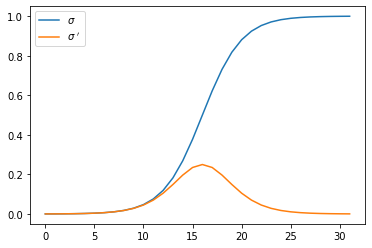

In [4]:
# Quick visualization

import matplotlib.pyplot as plt

values = np.arange(-8,8, 0.5)
plt.plot(sigmoid(values))
plt.plot(sigmoidprime(values))
plt.legend(["$\sigma$", "$\sigma \ '$"])
plt.show()

# 3 Perceptron

In [49]:

class Perceptron:
    """Implementation of a perceptron taken from the coding class, but with sigmoid activation function."""

    def __init__(self, input_units):
        self.input_units = input_units
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        self.alpha = 1
        
    def forward_step(self, input_data):
        """Perform forward step"""
        weighted_sum =  self.weights @ input_data + self.bias 
        return sigmoid(weighted_sum)
        
    def update(self, delta):
        self.bias -= delta * self.alpha
        self.weights -= delta * self.alpha
        

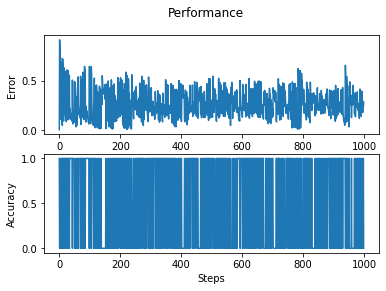

In [51]:
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],[0,1],[1,0],[1,1]])
# These are possible labels form some logical gates.
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

# Very simple example of a neural network with 2 inputs and 1 hidden layer
class MLP:
    def __init__(self, inputs=2, neurons_in_layer=4):
        self.perceptrons = [Perceptron(inputs) for _ in range(neurons_in_layer)]
        self.output_neuron = Perceptron(neurons_in_layer)

    def forward_step(self, input_data):
        self.hidden_activation = np.array([perceptron.forward_step(input_data) for perceptron in self.perceptrons])
        return self.hidden_activation
                    
    def backprop_step(self, label, output):
        # Calculate adjustment for output layer
        delta_output = -(label - output) * sigmoidprime(output)
        self.output_neuron.update(delta_output)

        # Calculate adjustment for hidden layer
        for i, perceptron in enumerate(self.perceptrons):
            delta = delta_output * self.hidden_activation[i]
            perceptron.update(delta)

# Now let's train the perceptron.
t = t_xor

mlp = MLP(2, 4)

# Initialize lists to store steps and performance.
steps = []
accuracies = []
losses = []

for i in range(1000):
    steps.append(i)
    # Draw random sample with corresponding label
    index = np.random.randint(len(x))
    sample = x[index]
    label = t[index]

    hidden_layer_output = mlp.forward_step(sample)
    output = mlp.output_neuron.forward_step(hidden_layer_output)

    # Calculate square error
    loss = (label - output) ** 2
    losses.append(loss)

    accuracy = 1 if (label == 1 and output >= 0.5) or (label == 0 and output < 0.5) else 0
    accuracies.append(accuracy)
    
    # Perform backpropagation
    mlp.backprop_step(label, output)


# Print the performance
fig, axs = plt.subplots(2)
fig.suptitle('Performance')
axs[0].plot(steps, losses)
axs[0].set(xlabel='Steps', ylabel='Error')

axs[1].plot(steps, accuracies)
axs[1].set(xlabel='Steps', ylabel='Accuracy')

plt.show()
    